In [1]:
import copy

from Utilities import *
from PuzzlePiece import *

In [2]:
# gather all the pieces
target_pieces = {}
tried_pieces = {}

for p in ['C','N','NE','E','SE','S','SW','W','NW']:
    target_pieces[p] = Piece('representations/' + p + '_border_ordered.csv')

In [3]:
# get the first piece
query = target_pieces.pop('C') # this piece will grow 
tried_pieces['C'] = copy.deepcopy(query) # keep a copy in case we need to go back 

In [4]:
# find the closest match in the other pieces
mx_score = 0
mx_piece = ''

alignments = {}
for p in target_pieces:
    # need an alignment object to store the results from these 
    target_rev = { i:target_pieces[p].sampled_pts[i]
                   for i in list(target_pieces[p].sampled_pts.keys())[::-1] }
    SuffTable, mx, mx_Q, mx_T, length = \
        AlignPieces_Euclid(query.sampled_pts, target_rev, window = 10)
    
    sims = []
    for i in range(1,len(SuffTable)):
        for j in range(1,len(SuffTable[i])):
            sims.append(SuffTable[i][j])

    sims.sort()
    cutoff = sims[int(len(sims)*.01)]
    
    # could build the dynamic programming table here
    SuffTable, mx, mx_Q, mx_T, length = \
        AlignPieces_Euclid(query.sampled_pts, target_rev,
                           mode = 'SW align', window = 10, cutoff = cutoff,
                           distr_score = False, avg = avg(sims), sd = sd(sims))
    
    print(p, mx, mx_Q, mx_T, length, mx/length)
    alignments[p] = { 'SuffTable': SuffTable,
                      'mx_score': mx,
                      'mx_Q': mx_Q,
                      'mx_T': mx_T,
                      'length': length,
                      'cutoff': cutoff}
    
    if mx > mx_score:
        mx_score = mx
        mx_piece = p
        
print('Best: ', mx_piece, mx_score, length)

N 45 181 165 44 1.0227272727272727
NE 42 124 187 41 1.024390243902439
E 44 181 189 43 1.0232558139534884
SE 12 148 155 11 1.0909090909090908
S 35 69 71 34 1.0294117647058822
SW 15 52 45 14 1.0714285714285714
W 22 22 98 20 1.1
NW 23 23 83 21 1.0952380952380953
Best:  N 45 21


In [5]:
mx_piece_rev = { i:target_pieces[mx_piece].sampled_pts[i]
                    for i in list(target_pieces[mx_piece].sampled_pts.keys())[::-1] }

mx_alignment = alignments[mx_piece]
SuffTable = mx_alignment['SuffTable']
mx = mx_alignment['mx_score']
mx_Q = mx_alignment['mx_Q']
mx_T = mx_alignment['mx_T']
length = mx_alignment['length']
cutoff = mx_alignment['cutoff']

print(mx_piece, mx, mx_Q, mx_T, length, mx/length)
target = target_pieces.pop(mx_piece)

N 45 181 165 44 1.0227272727272727


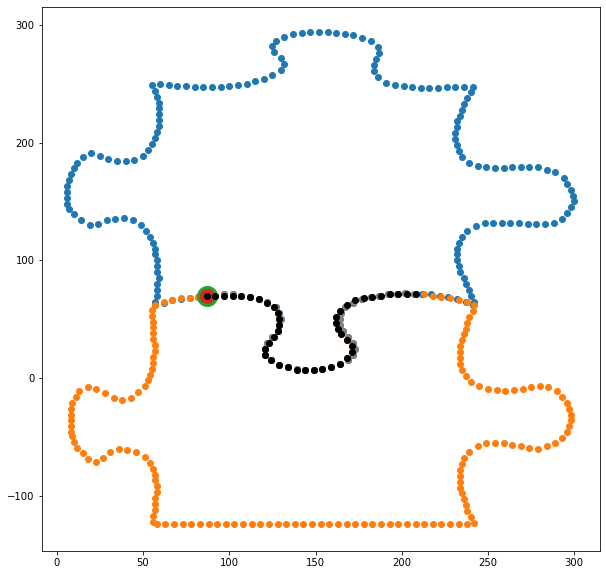

In [6]:
#find the best matched point - this is the end of the best match window
Q_pt = query.sampled_pts[list(query.sampled_pts.keys())[mx_Q-1]]
T_pt = target.sampled_pts[list(target.sampled_pts.keys())[::-1][mx_T-1]] 

# find x,y shift to align pieces
T_xshift = T_pt['x'] - Q_pt['x']
T_yshift = T_pt['y'] - Q_pt['y'] 

plt.figure(figsize = [10,10])
plt.scatter( [query.sampled_pts[k]['x'] for k,v in query.sampled_pts.items() ],
             [query.sampled_pts[k]['y'] for k,v in query.sampled_pts.items() ])
plt.scatter( [target.sampled_pts[k]['x'] - T_xshift for k,v in target.sampled_pts.items() ],
             [target.sampled_pts[k]['y'] - T_yshift for k,v in target.sampled_pts.items() ])

plt.plot( [Q_pt['x'], T_pt['x'] - T_xshift],
          [Q_pt['y'], T_pt['y'] - T_yshift],
        linewidth = 3)

# show best matched points - second will overplot first due to alignment
plt.scatter( Q_pt['x'], Q_pt['y'], s=400)
plt.scatter( T_pt['x'] - T_xshift, T_pt['y'] - T_yshift, s=196 ) 

# show similarity window
# the black and white points repsent the points in the positive scoring diagonal
# of the suffix table starting at the maximum scoring point
# these points are the best locally aligned points
Q_window = [query.sampled_pts[p] for p in list(query.sampled_pts.keys())[ max((mx_Q-length),0):(mx_Q)] ]
plt.scatter( [p['x'] for p in Q_window],
             [p['y'] for p in Q_window], c = 'grey' )
T_window = [target.sampled_pts[p] for p in list(target.sampled_pts.keys())[::-1][(mx_T-length):(mx_T)] ]
plt.scatter( [p['x'] - T_xshift for p in T_window],
             [p['y'] - T_yshift for p in T_window], c = 'black' )

In [7]:
# combine the pieces into one piece

# compute fine alignment over the aligned window
# for all original points in target shifted by fine alignment:
    # add to query with OR function for collisions

In [ ]:
# compute new boundary
    # floodfill

In [ ]:
# resample boundary

In [ ]:
# put boundary points in order

In [ ]:
# set new combined piece to query and do next alignment